In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("house_prices.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.drop(['area_type','society','balcony','availability'],axis="columns",inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df.shape

(13320, 5)

In [9]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df=df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df.shape

(13246, 5)

In [12]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df['bhk']=df['size'].apply(lambda x:int(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [15]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def convert_sqft_to_num(x):
    x=str(x)
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [17]:
df['total_sqft']=df['total_sqft'].apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]


In [18]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [20]:
df['location'].unique()
df[df.location=="Rajaji Nagar"]

,location,size,total_sqft,bath,price,bhk
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6
107,Rajaji Nagar,3 BHK,1640.0,3.0,229.0,3
324,Rajaji Nagar,3 BHK,2390.0,3.0,415.0,3
407,Rajaji Nagar,3 BHK,2390.0,3.0,410.0,3
...,...,...,...,...,...,...
12715,Rajaji Nagar,2 BHK,1224.0,2.0,105.0,2
12748,Rajaji Nagar,5 Bedroom,2500.0,4.0,650.0,5
12824,Rajaji Nagar,2 Bedroom,1314.0,2.0,225.0,2
12847,Rajaji Nagar,2 BHK,1440.0,2.0,165.0,2


In [21]:
df1=df.copy()
df1['price_per_square_ft']=df['price']*100000/df['total_sqft']
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_square_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
df1.location = df1.location.apply(lambda x: x.strip())
location_stats = df1['location'].value_counts(ascending=False)
location_stats
df1[df1.location=="Rajaji Nagar"]


,location,size,total_sqft,bath,price,bhk,price_per_square_ft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181.818182
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
107,Rajaji Nagar,3 BHK,1640.0,3.0,229.0,3,13963.414634
324,Rajaji Nagar,3 BHK,2390.0,3.0,415.0,3,17364.016736
407,Rajaji Nagar,3 BHK,2390.0,3.0,410.0,3,17154.811715
...,...,...,...,...,...,...,...
12715,Rajaji Nagar,2 BHK,1224.0,2.0,105.0,2,8578.431373
12748,Rajaji Nagar,5 Bedroom,2500.0,4.0,650.0,5,26000.000000
12824,Rajaji Nagar,2 Bedroom,1314.0,2.0,225.0,2,17123.287671
12847,Rajaji Nagar,2 BHK,1440.0,2.0,165.0,2,11458.333333


In [23]:
len(location_stats[location_stats>10])

240

In [24]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10


BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [25]:
df1['location']=df1['location'].apply(lambda x:'other' if x in location_stats_less_than_10
 else x)

In [26]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_square_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
df1['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [28]:
df1[df1.total_sqft/df1.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_square_ft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [29]:
df1.shape

(13200, 7)

In [30]:
df1=df1[~(df1.total_sqft/df1.bhk<300)]
df1.shape

(12456, 7)

In [31]:
import numpy as np
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_square_ft)
        st = np.std(subdf.price_per_square_ft)
        reduced_df = subdf[(subdf.price_per_square_ft>(m-st)) & (subdf.price_per_square_ft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df2 = remove_pps_outliers(df1)
df2.shape

(10242, 7)

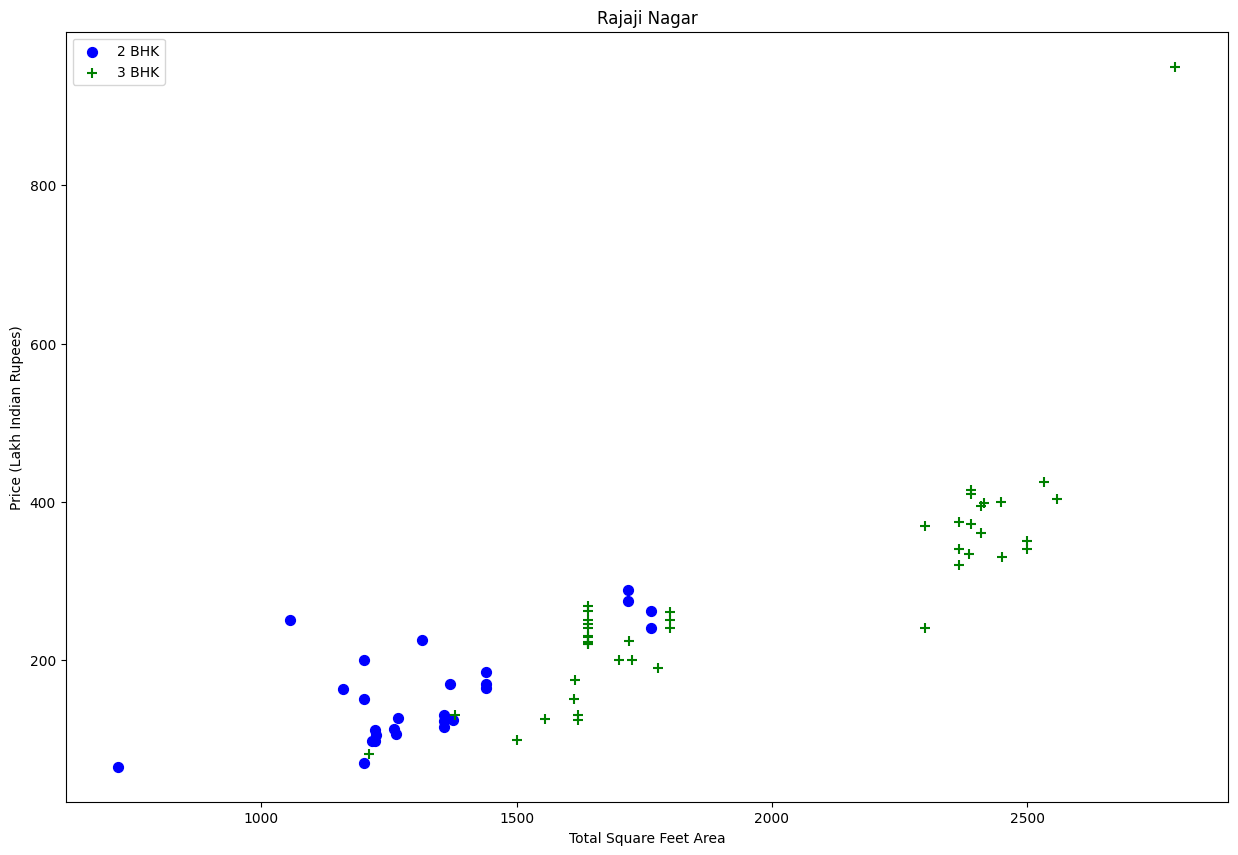

In [32]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df1,"Rajaji Nagar")

In [33]:
df1.shape

(12456, 7)

In [34]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_square_ft),
                'std': np.std(bhk_df.price_per_square_ft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_square_ft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df2 = remove_bhk_outliers(df1)
# df8 = df7.copy()
df2.shape

(8638, 7)

In [35]:
df2.head()
df2.shape

(8638, 7)

In [36]:
df3=df2[df2.bath<df2.bhk+2]

In [37]:
df4=df3.drop(['size','total_sqft'],axis="columns")
df4.head()
locations=df4['location']

In [38]:
df4.shape

(8508, 5)

In [39]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df4['location']=l.fit_transform(df4.location)
df4.head()

,location,bath,price,bhk,price_per_square_ft
0,79,2.0,39.07,2,3699.810606
2,225,2.0,62.00,3,4305.555556
3,159,3.0,95.00,3,6245.890861
4,151,2.0,51.00,2,4250.000000
6,183,4.0,204.00,4,7467.057101


In [40]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import tree

In [41]:
X=df4.drop(['price'],axis="columns")
y=df4['price']
X.head()

,location,bath,bhk,price_per_square_ft
0,79,2.0,2,3699.810606
2,225,2.0,3,4305.555556
3,159,3.0,3,6245.890861
4,151,2.0,2,4250.000000
6,183,4.0,4,7467.057101


In [42]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
X

,location,bath,bhk,price_per_square_ft
0,79,2.0,2,3699.810606
2,225,2.0,3,4305.555556
3,159,3.0,3,6245.890861
4,151,2.0,2,4250.000000
6,183,4.0,4,7467.057101
...,...,...,...,...
13314,87,3.0,3,6530.612245
13316,240,5.0,4,11111.111111
13317,194,2.0,2,5258.545136
13318,185,4.0,4,10407.336319


In [43]:
le=linear_model.LinearRegression()
le.fit(X,y)

LinearRegression()

In [44]:
le.predict([[225,2,3,3699]])

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([48.17705232])

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)
#cross_val_score(SVC(gamma='auto'),X,y,cv=3)

array([0.54696482, 0.65703535, 0.58904796, 0.57529352, 0.68115963])

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
def find_best(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name,config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best(X,y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

In [47]:

lr=LinearRegression()
lr.fit(X,y)
X

,location,bath,bhk,price_per_square_ft
0,79,2.0,2,3699.810606
2,225,2.0,3,4305.555556
3,159,3.0,3,6245.890861
4,151,2.0,2,4250.000000
6,183,4.0,4,7467.057101
...,...,...,...,...
13314,87,3.0,3,6530.612245
13316,240,5.0,4,11111.111111
13317,194,2.0,2,5258.545136
13318,185,4.0,4,10407.336319


In [48]:
x1=X.copy()
x1['locations']=locations
x1

,location,bath,bhk,price_per_square_ft,locations
0,79,2.0,2,3699.810606,Electronic City Phase II
2,225,2.0,3,4305.555556,Uttarahalli
3,159,3.0,3,6245.890861,Lingadheeranahalli
4,151,2.0,2,4250.000000,Kothanur
6,183,4.0,4,7467.057101,Old Airport Road
...,...,...,...,...,...
13314,87,3.0,3,6530.612245,Green Glen Layout
13316,240,5.0,4,11111.111111,other
13317,194,2.0,2,5258.545136,Raja Rajeshwari Nagar
13318,185,4.0,4,10407.336319,Padmanabhanagar


In [49]:
#x['locations']=locations
def predict_price(location1,sqft,bath,bhk):    
    loc_index = x1[x1["locations"]==location1]

    x = np.zeros(len(X.columns))
    #print(len(x))
    x[3] = sqft
    x[1] = bath
    x[2] = bhk
    x[0]=loc_index['location'][0]
    #print(x)
    

    return lr.predict([x])[0]

In [50]:
#loc_index = np.where(X.columns=="")
loc_index = x1[x1["locations"]=="Electronic City Phase II"]
loc_index['location'][0]
lr.predict([[255,2,3,4305.555556]])[0]

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.465748467915375

In [51]:
predict_price('Electronic City Phase II',1000, 2, 2)


/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-24.872344209755752

In [52]:
#225,2.0,62.00,3,4305.555556
locations
y=[i for i in locations]

len(y)

8508

In [60]:
location=x1['location']
z=[i for i in location]
z[2]

159

In [62]:
import pickle
with open('/Users/akshayapujithakolli/PycharmProjects/machine_learning_project/model/banglore_home_prices_model.pickle','wb')as f:

    pickle.dump(lr,f)

In [64]:
import json
columns = {
    'data_columns' : [col.lower() for col in x1.columns],
    'locations':[i for i in locations],
    'location':[i for i in location]
}
with open("/Users/akshayapujithakolli/PycharmProjects/machine_learning_project/model/columns.json","w") as f:
    f.write(json.dumps(columns))